In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import dca

'Tiempo de procesamiento: 11.514858513 segundos'

Nombre de campo/contrato/asignacion: SIHIL
Numero de campos de analisis: 
Analisis DCA Analogos (Y/''): Y
Tomar muestra desde fecha (yyyy-mm-dd): 2008-01-01
Generar archivos (Y/''): Y
Régimen Fiscal: 
Regalía Adicional Decimales: 


'Número de pozos en SIHIL: 39'

,produccion_mensual_campo_Mbd
fecha,
2012-11-01,110.40


Pozos perforados                            39.00
Pozos productores                           37.00
Pozos secos                                  2.00
Exito mecanico (%)                          94.87
Pozos activos                               21.00
Pozos cerrados                              16.00
EUR por pozo (MMb)                           5.97
EUR maxima (MMb)                            25.66
Produccion media mensual (Mbd)               1.56
Pico de producción mensual (MMb)            18.24
Produccion base de aceite_Mbd               25.47
Progduccion base de gas_asociado_MMpcd      15.41
Produccion base de condensado_Mbd            0.00
Np                                         229.63
Gp                                          98.81
Cp                                           0.00
Wp                                          74.37
OOIP                                     1,461.64
FR Aceite                                    0.16
OGIP                                       436.24


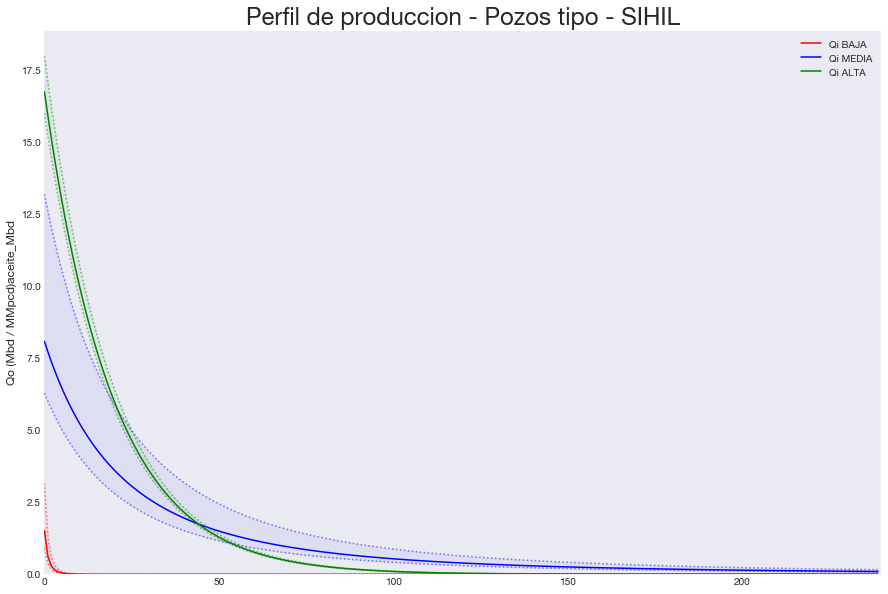

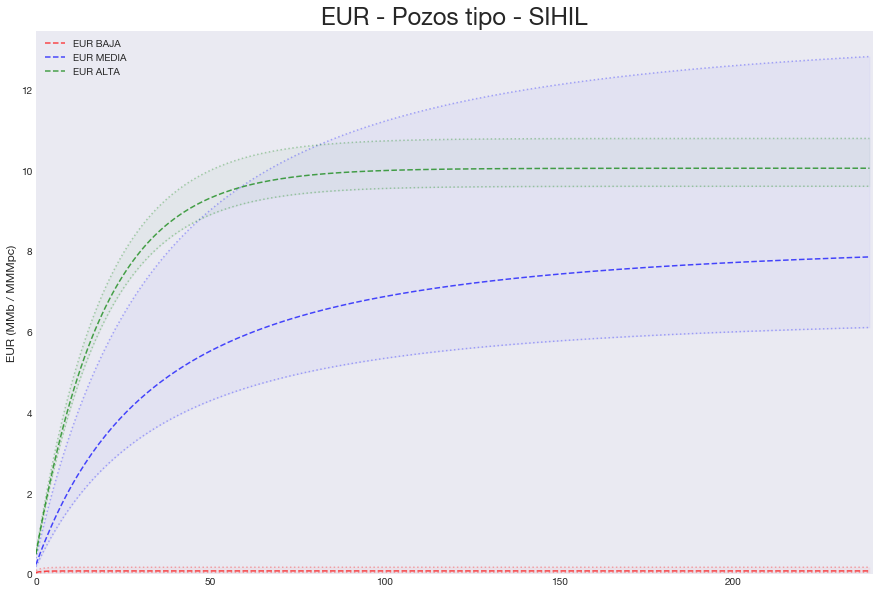

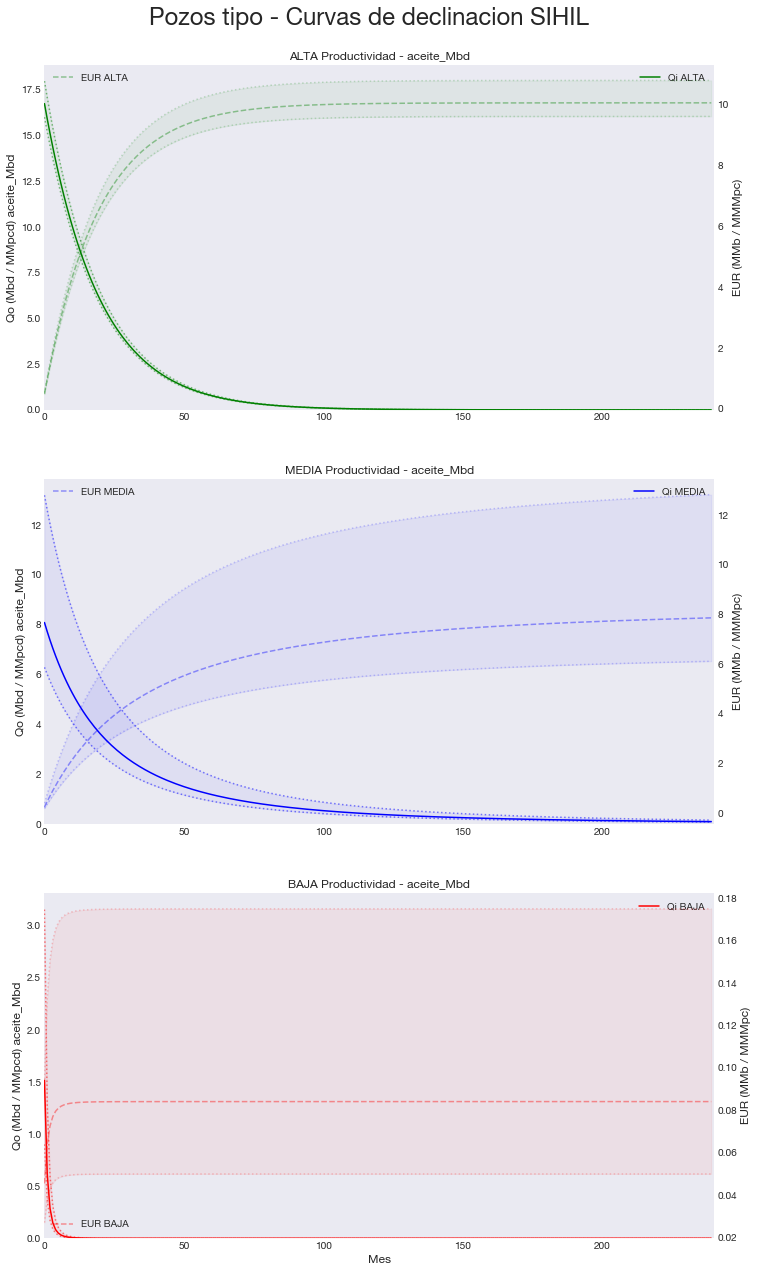

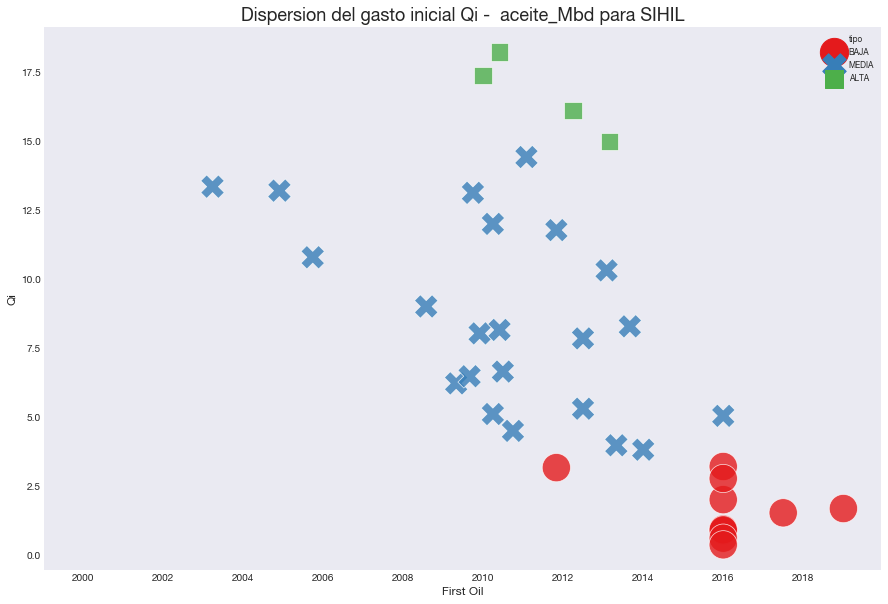

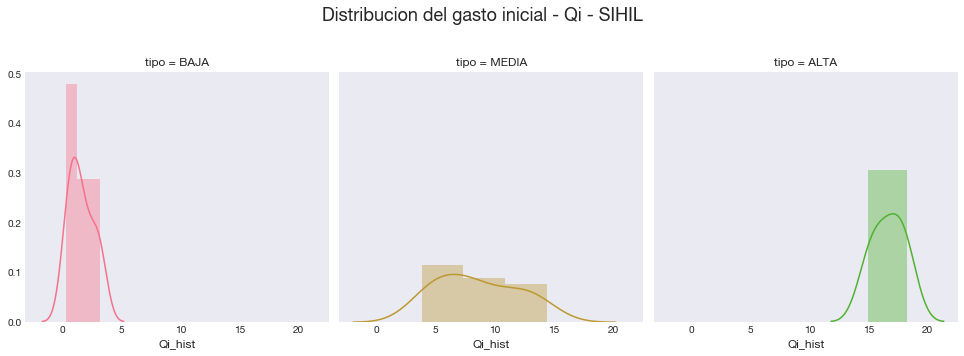

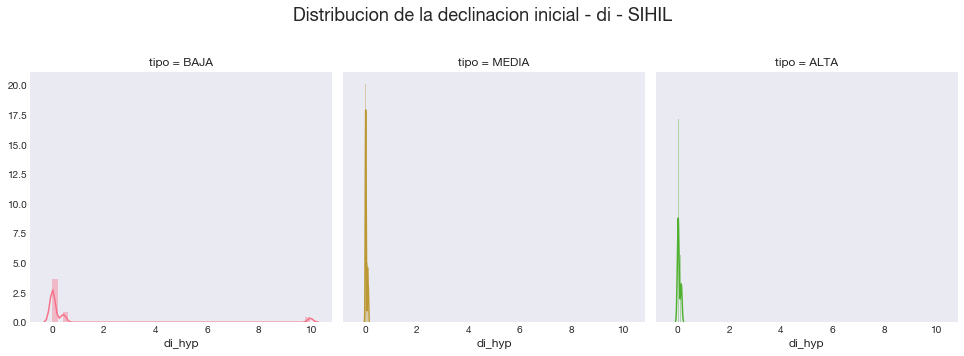

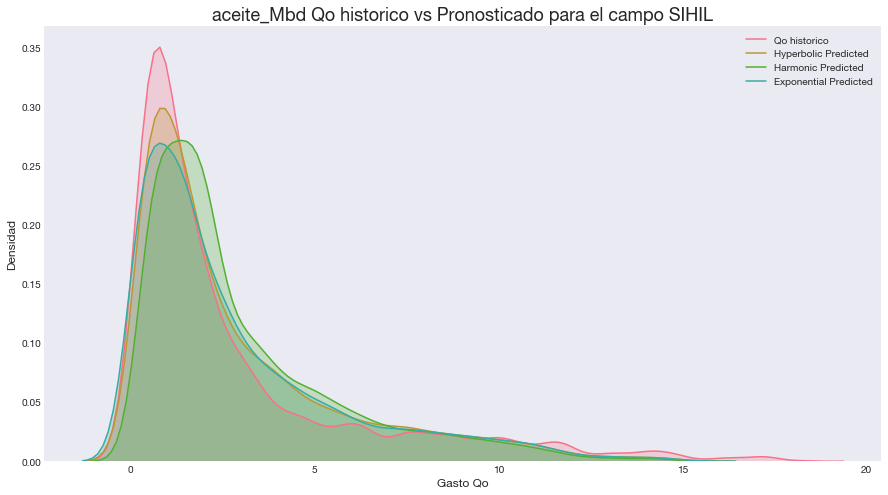

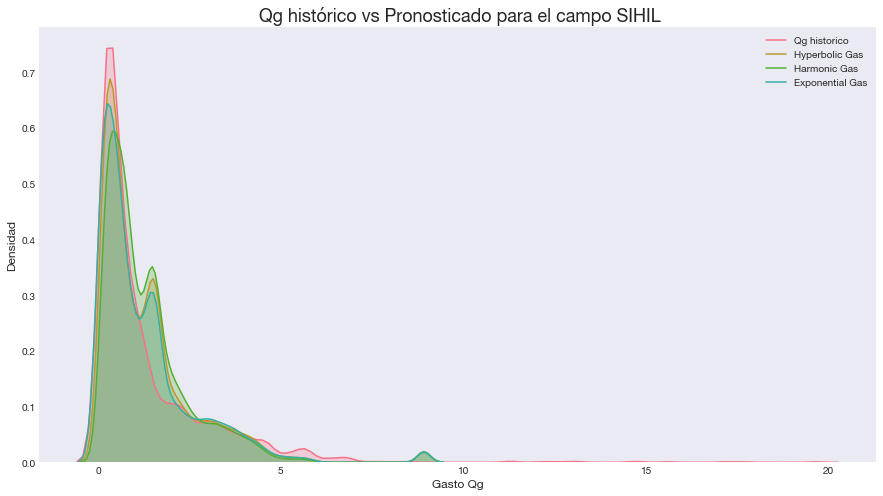

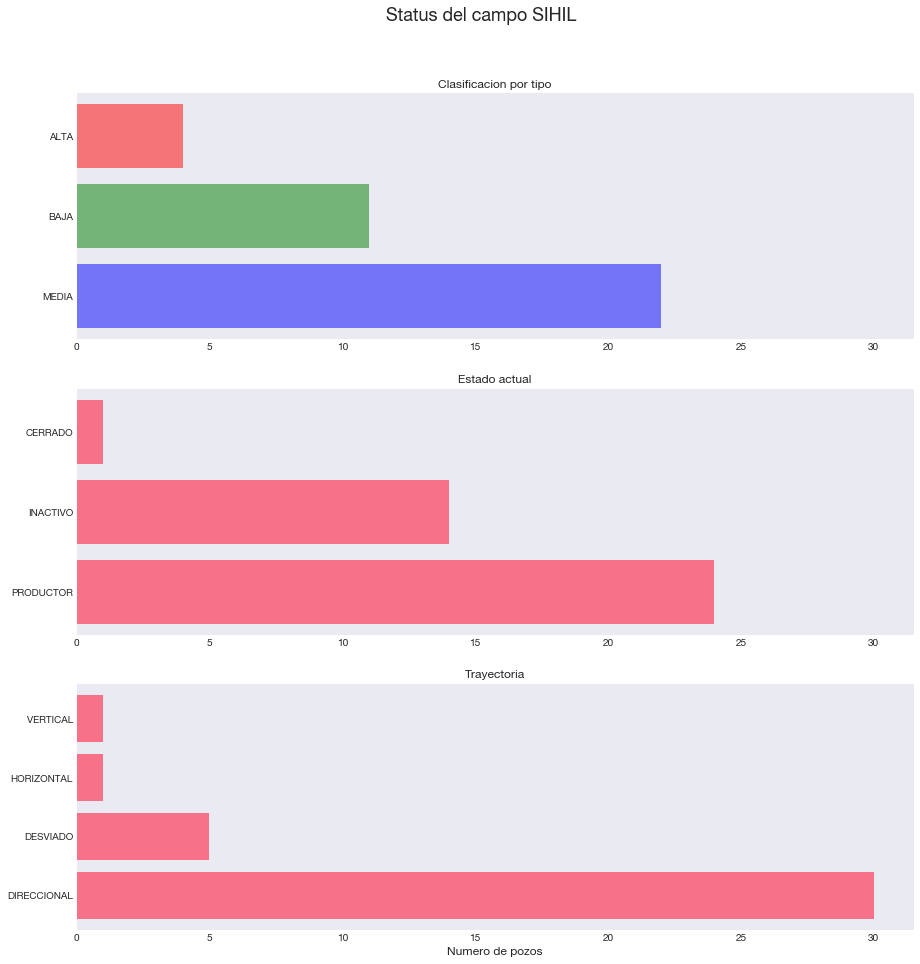

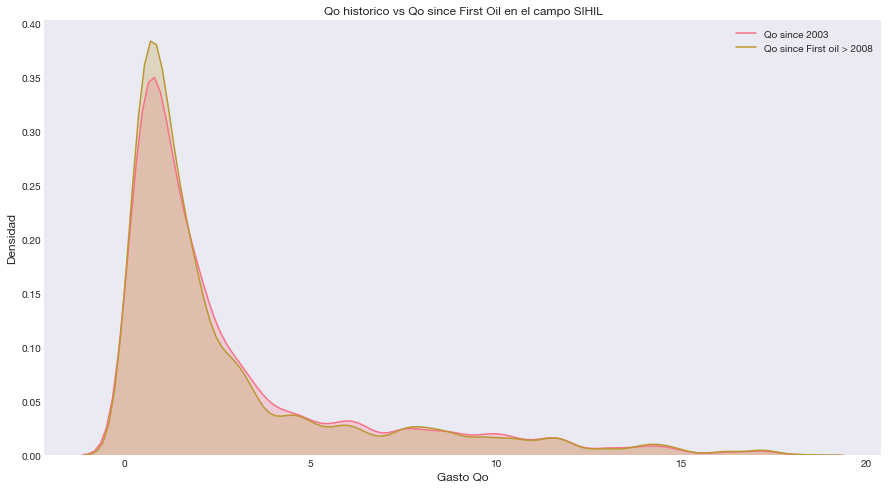

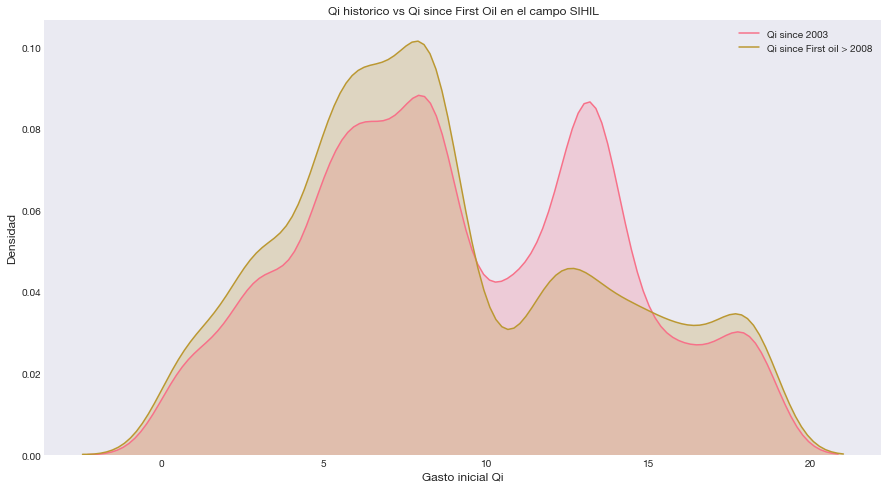

'Número de campos muestra para SIHIL: 42'

'Numero de campos analogos: 5'

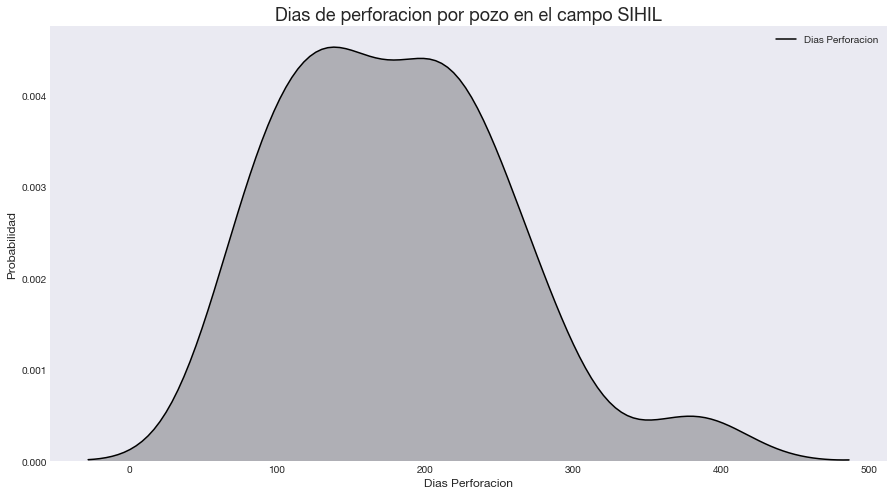

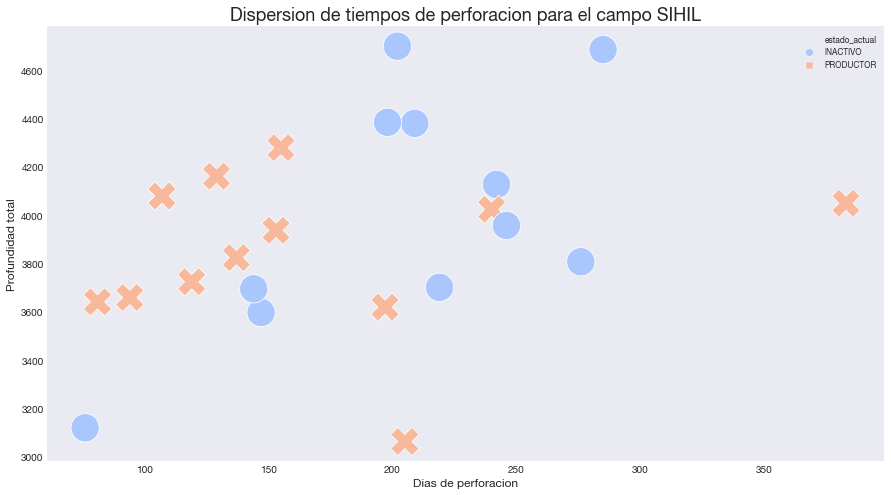

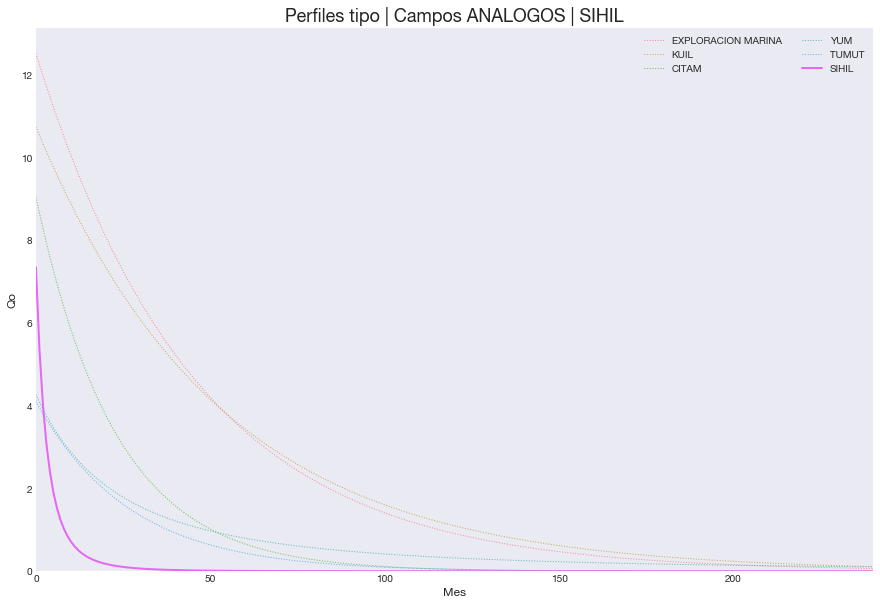

5

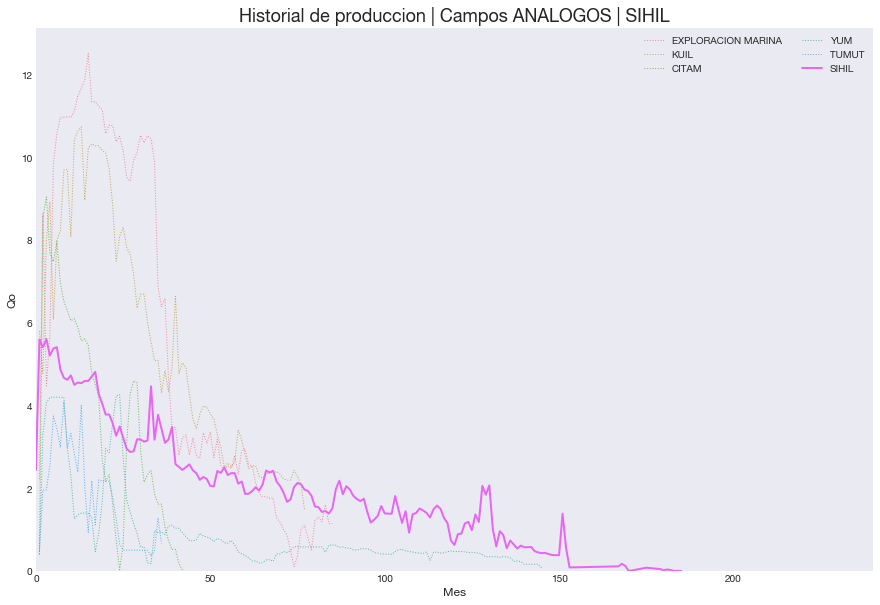

'Tiempo de procesamiento: 49.16930151500003 segundos'

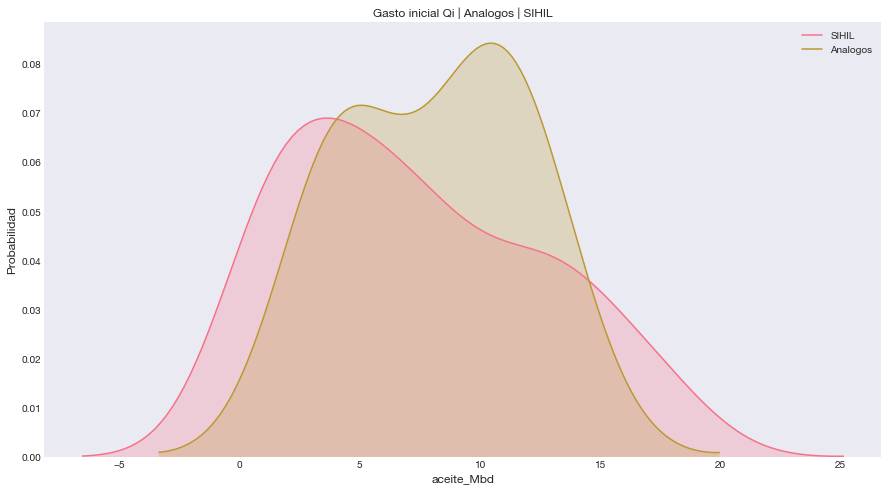

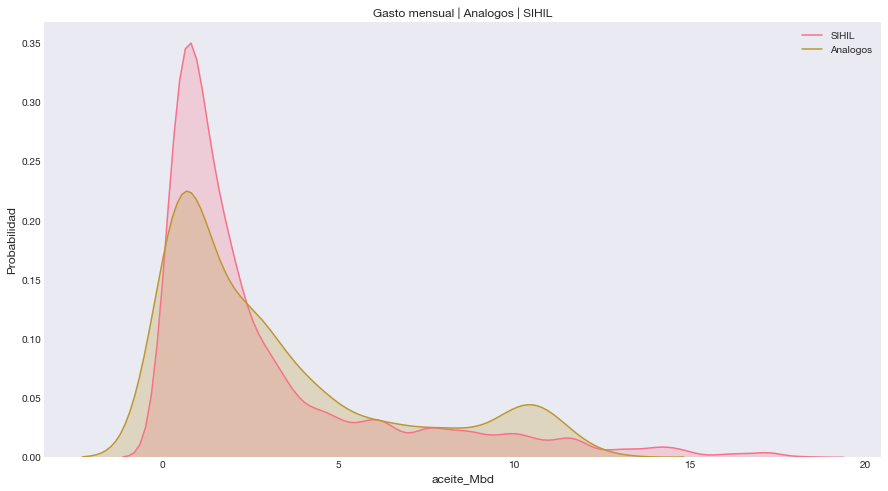

In [5]:
dca.run_dca()

In [7]:
from dca import *

In [10]:
import pandas as pd
import numpy as np
import hvplot

ModuleNotFoundError: No module named 'bokeh.plotting.helpers'

In [ ]:
import holoviews as hv
from holoviews import opts
from holoviews.operation.stats import univariate_kde

from bokeh.resources import CDN, INLINE, Resources

from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import DaysTicker, Legend, ColumnDataSource, LinearColorMapper, DatetimeTicker, Range1d, HoverTool, DataTable, DateFormatter, TableColumn, Band
from bokeh.layouts import gridplot
from bokeh.transform import dodge
import datetime as dt

from dca import resumen, perfil, input_campo, hidrocarburo, serie_resumen

In [ ]:
import hvplot

In [ ]:
datos_resumen=pd.DataFrame(resumen)
####Datos
source = ColumnDataSource(perfil)
source_resumen = ColumnDataSource(datos_resumen)


hover = HoverTool(tooltips = [
        ("mes",'mes')])

TOOLS = [hover,'save,pan,box_zoom,reset,wheel_zoom']

##### Tabla Resumen
columns = [TableColumn(field = 'index', title = 'Resumen del campo'),TableColumn(field='resumen', title="Valor")]
                    
tabla_resumen = DataTable(source=source_resumen, columns = columns, index_position = None,width=400, height=400)

###  Perfiles Tipo
plot_p = figure(title=str(input_campo)+" | Perfiles tipo", x_axis_type='linear', y_axis_type='linear',tools = TOOLS,  plot_width=400, plot_height=380)

plot_p.line(x = "mes", y = "baja_L",color = "DarkRed", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')
plot_p.line(x = "mes", y = "baja_M",color = "DarkRed", legend='Qo Baja',source = source, alpha = 0.8, line_width = 1)
plot_p.line(x = "mes", y = "baja_H",color = "DarkRed", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')

plot_p.line(x = "mes", y = "media_L", color = "DarkBlue", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')
plot_p.line(x = "mes", y = "media_M", color = "DarkBlue", legend='Qo Media',source = source, alpha = 0.8, line_width = 1)
plot_p.line(x = "mes", y = "media_H", color = "DarkBlue", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')

plot_p.line(x = "mes", y = "alta_L", color = "DarkGreen", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')
plot_p.line(x = "mes", y = "alta_M", color = "DarkGreen", legend='Qo Alta', source = source, alpha = 0.8, line_width = 1)
plot_p.line(x = "mes", y = "alta_H", color = "DarkGreen", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')


#plot_p.y_range =Range1d(perfil.baja_L.min(),perfil.alta_H.max(), bounds= (perfil.baja_L.min()-1,perfil.alta_H.max()+1))
plot_p.x_range = Range1d(perfil.index.min(),perfil.index.max(), bounds = (perfil.index.min(),perfil.index.max()))


plot_p.varea(x='mes',y1='baja_L',y2='baja_H',  source=source,alpha=0.2,color='coral')
plot_p.varea(x='mes',y1='media_L',y2='media_H',  source=source,alpha=0.2,color='LightBlue')
plot_p.varea(x='mes',y1='alta_L',y2='alta_H',  source=source,alpha=0.2,color='LightGreen')

plot_p.legend.location = 'top_right'
plot_p.xaxis.axis_label = 'Mes'
plot_p.yaxis.axis_label = 'Qo promedio mes (Mbd)'

### EUR
plot_EUR = figure(title="EUR (MMb) | "+str(input_campo),
                  x_axis_type='linear', 
                  y_axis_type='linear',
                  tools = TOOLS,  
                  plot_width=400, 
                  plot_height=400)

plot_EUR.line(x = "mes", y = "EUR_baja_L",color = "DarkRed",source = source, alpha = 0.4, line_width = 1,line_dash='dotted')
plot_EUR.line(x = "mes", y = "EUR_baja_M",color = "DarkRed", legend='EUR Baja',source = source, alpha = 0.8, line_width = 1)
plot_EUR.line(x = "mes", y = "EUR_baja_H",color = "DarkRed", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')


plot_EUR.line(x = "mes", y = "EUR_media_L", color = "DarkBlue", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')
plot_EUR.line(x = "mes", y = "EUR_media_M", color = "DarkBlue", legend='EUR Media', source = source, alpha = 0.8, line_width = 1)
plot_EUR.line(x = "mes", y = "EUR_media_H", color = "DarkBlue", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')


plot_EUR.line(x = "mes", y = "EUR_alta_L", color = "DarkGreen", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')
plot_EUR.line(x = "mes", y = "EUR_alta_M", color = "DarkGreen", legend='EUR Alta',source = source, alpha = 0.8, line_width = 1)
plot_EUR.line(x = "mes", y = "EUR_alta_H", color = "DarkGreen", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')


#plot_EUR.y_range =Range1d(perfil.EUR_baja_L.min(),perfil.EUR_alta_H.max()+1, bounds= (perfil.EUR_baja_L.min()-1,perfil.EUR_alta_H.max()+1))
plot_EUR.x_range = Range1d(perfil.index.min(),perfil.index.max(), bounds = (perfil.index.min(),perfil.index.max()))

plot_EUR.varea(x='mes',y1='EUR_baja_L',y2='EUR_baja_H',  source=source,alpha=0.2,color='coral')
plot_EUR.varea(x='mes',y1='EUR_media_L',y2='EUR_media_H',  source=source,alpha=0.2,color='LightBlue')
plot_EUR.varea(x='mes',y1='EUR_alta_L',y2='EUR_alta_H',  source=source,alpha=0.2,color='LightGreen')

plot_EUR.legend.location = "top_right"
plot_EUR.xaxis.axis_label = 'Mes'
plot_EUR.yaxis.axis_label = 'EUR (MMb/MMMpc)'



### Perfil BAJA
plot_baja = figure(title=str(input_campo)+" | Perfil tipo BAJA Qi ", x_axis_type='linear', y_axis_type='linear', tools = TOOLS,  plot_width=380, plot_height=300)

plot_baja.line(x = "mes", y = "baja_L", color = "DarkRed", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')
plot_baja.line(x = "mes", y = "baja_M", color = "DarkRed", source = source, alpha = 0.8, line_width = 1)
plot_baja.line(x = "mes", y = "baja_H", color = "DarkRed", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')

plot_baja.line(x = "mes", y = "EUR_baja_L",color = "Red", source = source, alpha = 0.2, line_width = 1,line_dash='dashed')
plot_baja.line(x = "mes", y = "EUR_baja_M",color = "Red", source = source, alpha = 0.4, line_width = 1)
plot_baja.line(x = "mes", y = "EUR_baja_H",color = "Red", source = source, alpha = 0.2, line_width = 1,line_dash='dashed')


#plot_baja.y_range =Range1d(perfil.baja_L.min(),perfil.alta_H.max(), bounds= (perfil.baja_L.min()-1,perfil.alta_H.max()+1))
plot_baja.x_range = Range1d(perfil.index.min(),perfil.index.max(), bounds = (perfil.index.min(),perfil.index.max()))

plot_baja.legend.location = "top_right"
plot_baja.xaxis.axis_label = 'Mes'
plot_baja.yaxis.axis_label = 'Qo promedio mes (Mbd)'

plot_baja.varea(x='mes',y1='baja_L',y2='baja_H', source=source,alpha=0.4,color='Red')
plot_baja.varea(x='mes',y1='EUR_baja_L',y2='EUR_baja_H', source=source,alpha=0.2,color='coral')

### Perfil MEDIA
plot_media = figure(title=str(input_campo)+" | Perfil tipo MEDIA Qi ", x_axis_type='linear', y_axis_type='linear', tools = TOOLS,  plot_width=380, plot_height=300)

plot_media.line(x = "mes", y = "media_L", color = "DarkBlue", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')
plot_media.line(x = "mes", y = "media_M", color = "DarkBlue", source = source, alpha = 0.8, line_width = 1)
plot_media.line(x = "mes", y = "media_H", color = "DarkBlue", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')


plot_media.line(x = "mes", y = "EUR_media_L",color = "Blue", source = source, alpha = 0.2, line_width = 1,line_dash='dashed')
plot_media.line(x = "mes", y = "EUR_media_M",color = "Blue", source = source, alpha = 0.4, line_width = 1)
plot_media.line(x = "mes", y = "EUR_media_H",color = "Blue", source = source, alpha = 0.2, line_width = 1,line_dash='dashed')


#plot_media.y_range =Range1d(perfil.baja_L.min(),perfil.alta_H.max(), bounds= (perfil.baja_L.min()-1,perfil.alta_H.max()+1))
plot_media.x_range = Range1d(perfil.index.min(),perfil.index.max(), bounds = (perfil.index.min(),perfil.index.max()))

plot_media.legend.location = "top_right"
plot_media.xaxis.axis_label = 'Mes'
plot_media.yaxis.axis_label = 'Qo promedio mes (Mbd)'

plot_media.varea(x='mes',y1='media_L',y2='media_H',source=source,alpha=0.4,color='LightBlue')
plot_media.varea(x='mes',y1='EUR_media_L',y2='EUR_media_H',source=source,alpha=0.2,color='LightBlue')
           

### Perfil ALTA
plot_alta = figure(title=str(input_campo)+" | Perfil tipo ALTA Qi ", x_axis_type='linear', y_axis_type='linear', tools = TOOLS,  plot_width=380, plot_height=300)

plot_alta.line(x = "mes", y = "alta_L",color = "DarkGreen", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')
plot_alta.line(x = "mes", y = "alta_M",color = "DarkGreen", source = source, alpha = 0.8, line_width = 1)
plot_alta.line(x = "mes", y = "alta_H",color = "DarkGreen", source = source, alpha = 0.4, line_width = 1,line_dash='dotted')

plot_alta.line(x = "mes", y = "EUR_alta_L",color = "Green", source = source, alpha = 0.2, line_width = 1,line_dash='dashed')
plot_alta.line(x = "mes", y = "EUR_alta_M",color = "Green", source = source, alpha = 0.4, line_width = 1)
plot_alta.line(x = "mes", y = "EUR_alta_H",color = "Green", source = source, alpha = 0.2, line_width = 1,line_dash='dashed')


#plot_alta.y_range =Range1d(perfil.baja_L.min(),perfil.media_H.max(), bounds= (perfil.baja_L.min()-1,perfil.alta_H.max()+1))
plot_alta.x_range = Range1d(perfil.index.min(),perfil.index.max(), bounds = (perfil.index.min(),perfil.index.max()))

plot_alta.legend.location = "top_right"
plot_alta.xaxis.axis_label = 'Mes'
plot_alta.yaxis.axis_label = 'Qo promedio mes (Mbd)'

plot_alta.varea(x='mes',y1='alta_L',y2='alta_H',  source=source,alpha=0.4,color='Green')
plot_alta.varea(x='mes',y1='EUR_alta_L',y2='EUR_alta_H',  source=source,alpha=0.2,color='LightGreen')



layout = gridplot([[tabla_resumen,plot_p,plot_EUR],[plot_alta,plot_media,plot_baja]], toolbar_options = dict(logo = None)) #Lists Of Rows Layout
show(layout)  #Se abré en navegador

output_file("output_pozos_tipo.html", title="Pozos Tipo")


####### Holoviews



hv.extension('bokeh')


dist = hv.Distribution(serie_resumen.dias_perforacion,
                       label='Dias de perforacion - Función de Probabilidad')
                       



hist=serie_resumen.dias_perforacion.dropna()
hist=np.histogram(hist)

plot_hist = hv.Histogram(hist)


#kde = univariate_kde(dist, 
 #                    bin_range=(0, serie_resumen.dias_perforacion.max()),
  #                   bw_method='scott', 
   #                  n_samples=1000)
#kde

scatter = hv.Scatter(serie_resumen,
                     kdims=['dias_perforacion','profundidad_total'],
                     label='Dias de perforacion vs Profundidad total')

#dist = dists.redim.label(dias_perforacion='Dias de perforacion')
scatter  = scatter.redim.label(dias_perforacion='Dias de perforacion', profundidad_total='Profundidad total')

tiempos = dist + scatter

tiempos

tiempos.opts(
    opts.Distribution(height=400, width=800, xaxis=True, 
                      xlabel='Dias de Perforacion',
                      xlim=(0,serie_resumen.dias_perforacion.max()),
                      line_width=1.00,
                      color='grey',
                      alpha=0.5,
                      tools=['hover']),
    opts.Scatter(height=400, width=800, xaxis=True, yaxis=True, size=10,line_width=0.25, color='orange')).cols(1)



hv.save(tiempos, 'output_tiempos.html',backend='bokeh')


###### HV Plot


tiempo_perf=serie_resumen.hvplot.scatter(x='dias_perforacion',y='profundidad_total', by='trayectoria',alpha=0.5)
tiempo_perf

pane = pn.panel(tiempo_perf)
pane

hv.render(tiempo_perf)